<a href="https://colab.research.google.com/github/NVishnevskaya/ad_12_climate/blob/main/vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fn = "data_1.csv"
df = pd.read_csv(fn, delimiter=";")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,...,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,...,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,...,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,...,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,35.0,Мужской,...,0.32,172.7,50.0,NaN,1.0,1.0,NaN,0.0,30.9,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Мужской,...,0.16,NaN,65.0,NaN,NaN,0.0,0.0,NaN,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0


In [ ]:
# Correction values
def data_correction():
    global df
    replace_climat = {"Cубтроп океанич": "Cубтропический океанический"}
    replace_delta_temp = {"Холодн": "Холоднее", "Тепле": "Теплее"}

    df["климат"] = df["климат"].transform(
        lambda x: replace_climat[x] if x in replace_climat else x)
    df["предпочтительное_изменение_температуры"] = df["предпочтительное_изменение_температуры"].transform(
        lambda x: replace_delta_temp[x] if x in replace_climat else x)


def dtype_to_int(cols: list):
    for col in cols:
        df[col] = df[col].astype(int)

In [ ]:
data_correction()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          484 non-null    float64
 1   время_года                                   484 non-null    object 
 2   климат                                       484 non-null    object 
 3   город                                        484 non-null    object 
 4   страна                                       484 non-null    object 
 5   способ_охлаждения                            484 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          337 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      413 non-null    float64
 9   пол                                          412 non-null    object 
 10  ощ

In [ ]:
# утепление относительно чего? что это...
# почему оценка вещественное число - ? какой тип шкалы
nominal_columns = ["время_года", "климат", "город", "страна", "способ_охлаждения",
                   "режим_при_смешанном_типе_охлаждения", "способ_обогрева",
                   "пол", "ощущение_температуры_(bool)",
                   "предпочтительное_изменение_температуры",
                   "предпочтительное_изменение_движения_воздуха", "окно",
                    "двери", "отопление"
                   ]
sequenced_columns = ["год", "оценка_комфорта"]
numeric_columns = ["возраст", "ощущение_температуры", "утепление",
                   "температура_воздуха_в_помещении",
                   "температура_воздуха_на_улице",
                   "rh", "скорость_воздуха", "рост", "вес",
                   "среднемесячная_температура_на_улице", "количество_рекламаций"
                   ]

In [ ]:
df[numeric_columns]

,возраст,ощущение_температуры,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,среднемесячная_температура_на_улице,количество_рекламаций
0,22.0,0.0,0.54,22.9,22.8,48.9,0.26,NaN,NaN,28.9,0
1,40.0,-2.0,0.61,74.8,23.7,39.2,0.12,NaN,NaN,84.0,0
2,42.0,1.0,0.57,25.6,24.5,34.7,0.08,NaN,NaN,32.8,0
3,27.0,-0.5,0.61,24.2,23.8,50.0,27.16,NaN,NaN,28.9,1
4,46.0,0.0,0.57,23.8,24.1,35.8,63.83,NaN,NaN,32.8,0
...,...,...,...,...,...,...,...,...,...,...,...
479,35.0,0.0,0.46,31.6,NaN,69.1,0.32,172.7,50.0,30.9,0
480,NaN,-1.0,0.64,26.5,NaN,61.0,0.16,NaN,65.0,30.8,0
481,NaN,-1.0,0.74,26.9,NaN,42.0,0.02,NaN,76.0,21.6,0
482,NaN,-1.0,0.74,26.9,NaN,42.0,0.02,NaN,76.0,21.6,0


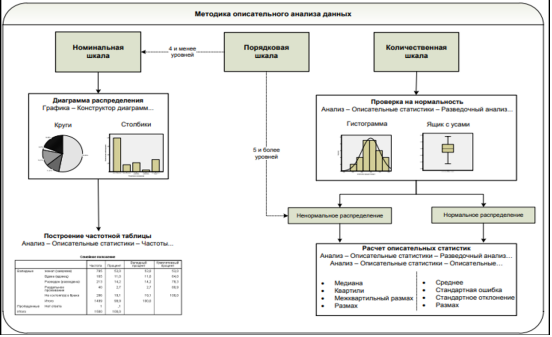

In [ ]:
# это для одной количественной колонки
def describe_numeric_column(col):
    fig, axs = plt.subplots(1, 2, figsize=(6, 4))
    sns.histplot(col, ax=axs[0])
    sns.boxplot(col, ax=axs[1])
    plt.tight_layout()

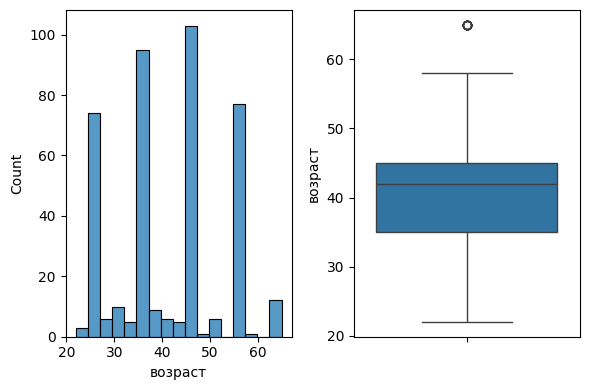

In [ ]:
describe_numeric_column(df[numeric_columns[0]])

In [ ]:
def show_all_numeric(num_sp):
    global df
    fig, axs = plt.subplots(len(num_sp), 2, figsize=(6, 4 * len(num_sp)))
    row_index = 0
    for num_col in num_sp:
        sns.histplot(df[num_col], ax=axs[row_index, 0])
        sns.boxplot(df[num_col], ax=axs[row_index, 1])
        row_index += 1
    plt.tight_layout()

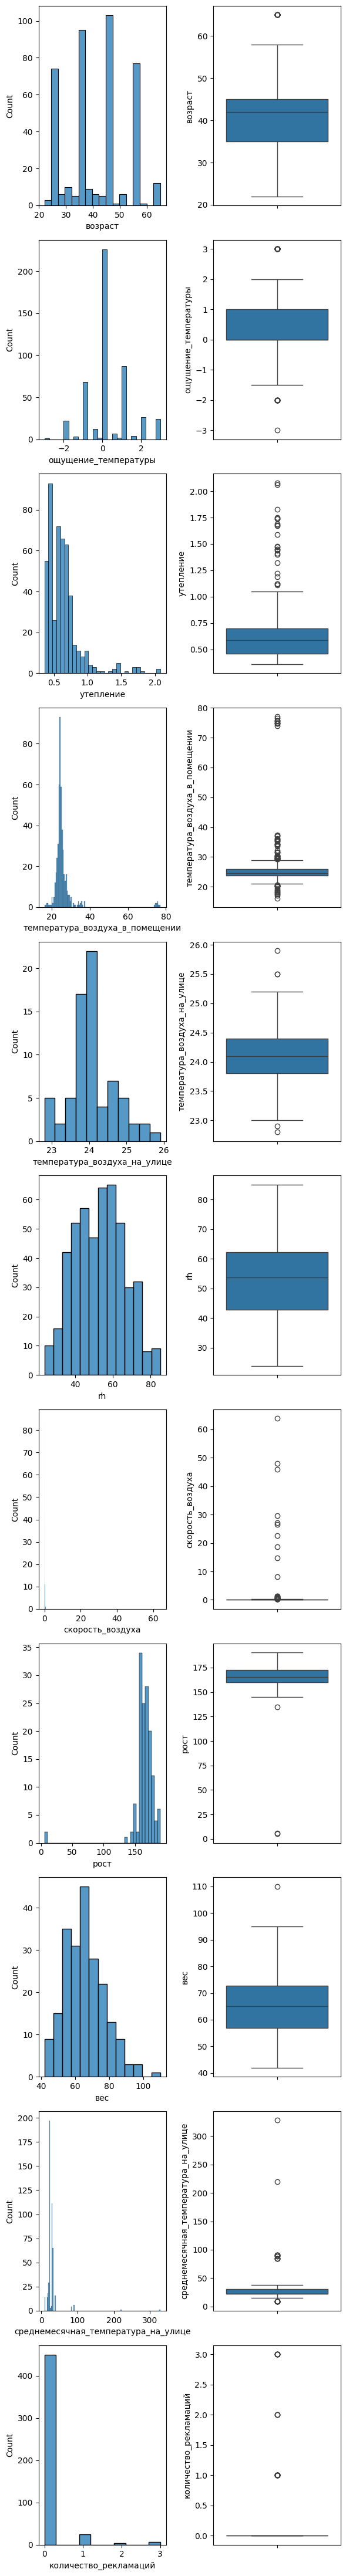

In [ ]:
show_all_numeric(numeric_columns)

In [ ]:
def show_all_numeric_4(num_sp):
    global df
    fig, axs = plt.subplots(len(num_sp) // 2, 4, figsize=(12, 2 * len(num_sp)))
    row_index = 0
    for index in range(0, len(num_sp) - 2, 2):
        num_col_1, num_col_2 = num_sp[index], num_sp[index + 1]
        sns.histplot(df[num_col_1], ax=axs[row_index, 0])
        sns.boxplot(df[num_col_1], ax=axs[row_index, 1])
        sns.histplot(df[num_col_2], ax=axs[row_index, 2])
        sns.boxplot(df[num_col_2], ax=axs[row_index, 3])
        row_index += 1
    plt.tight_layout()

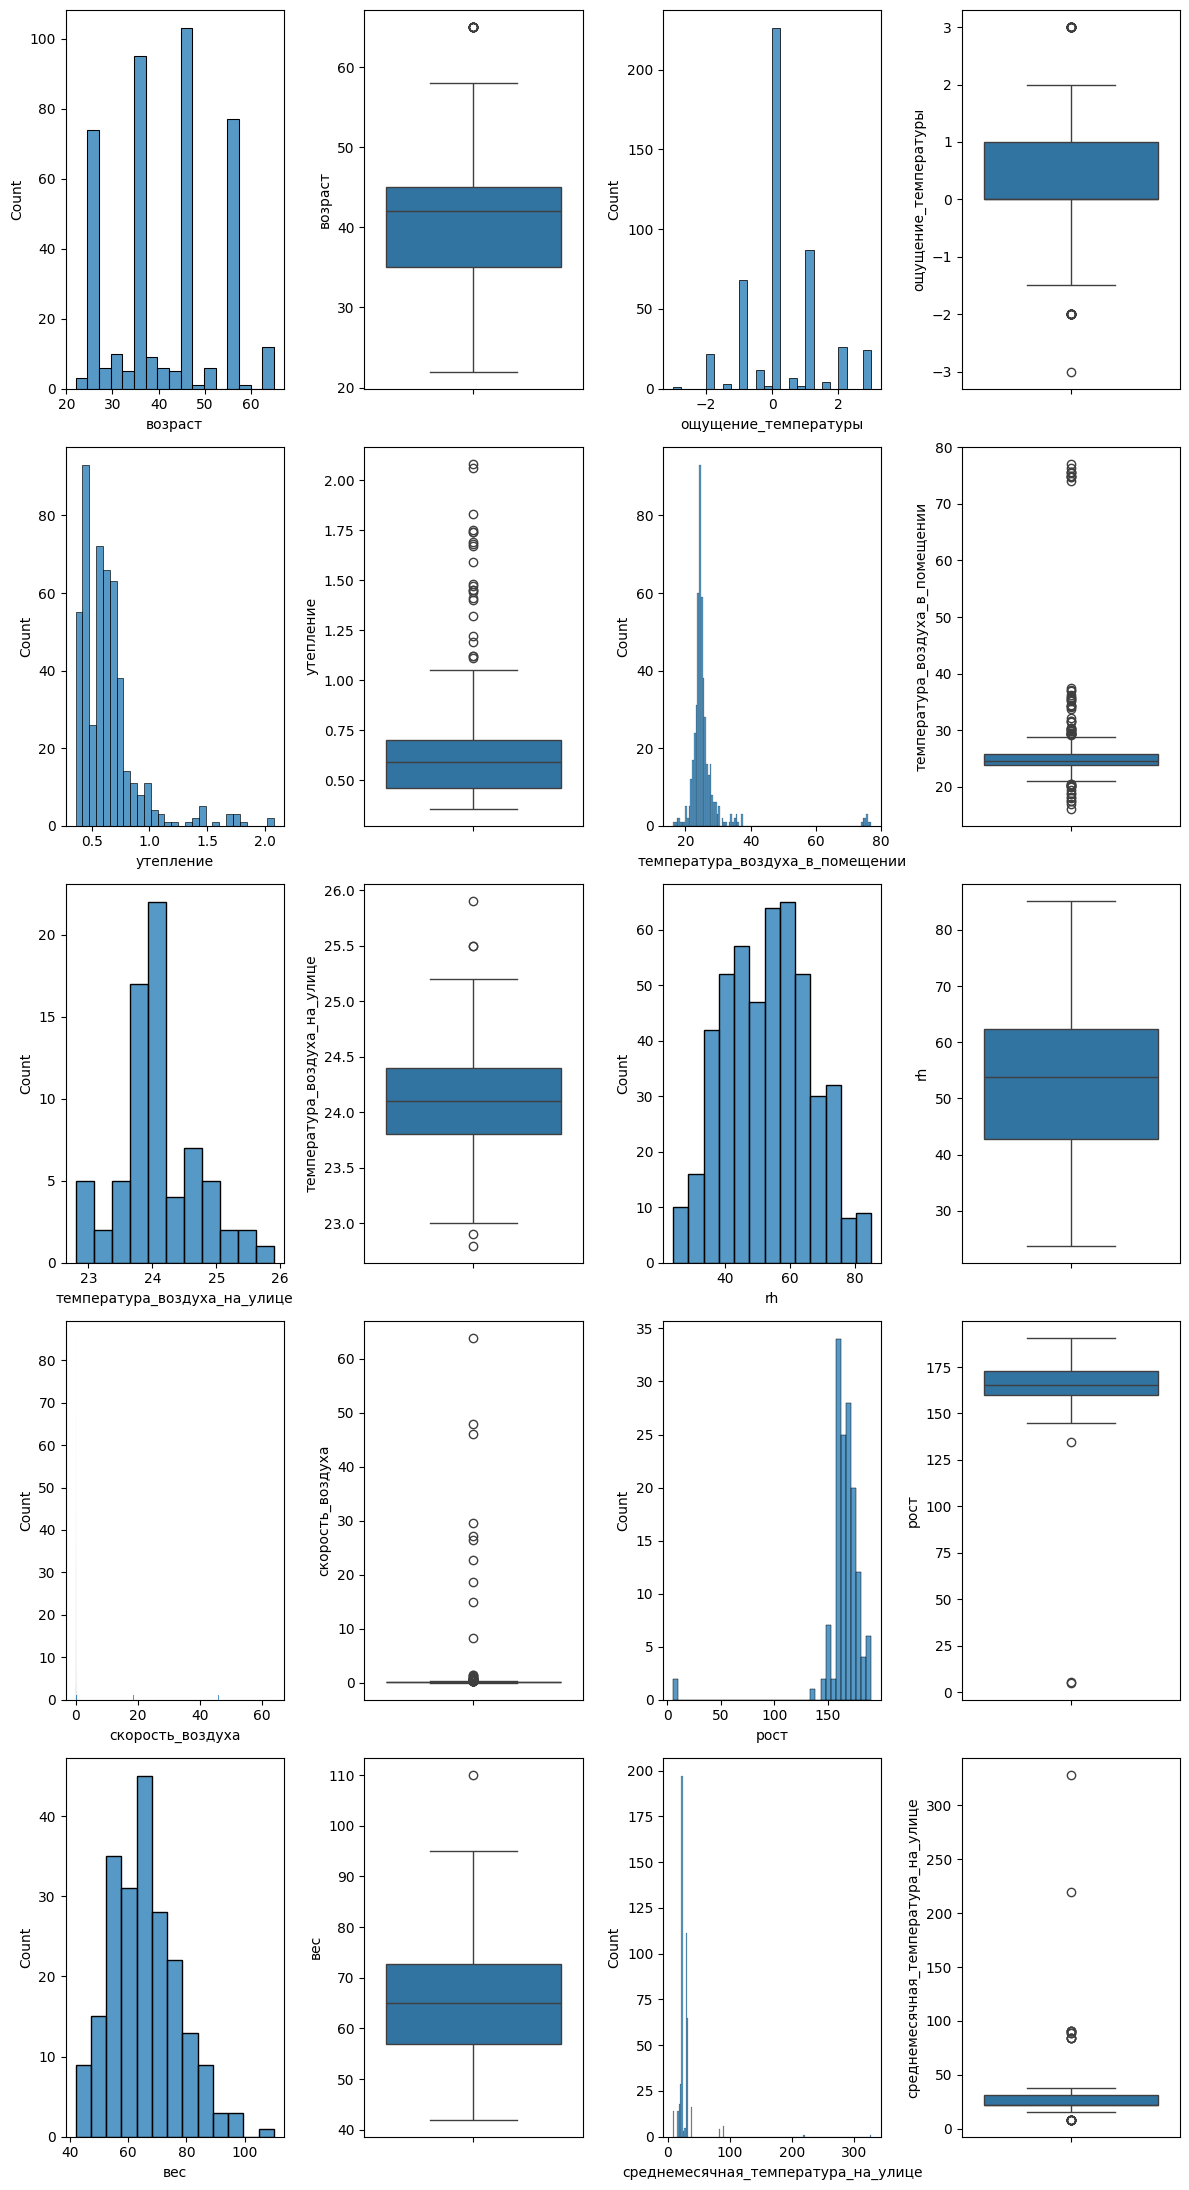

In [ ]:
show_all_numeric_4(numeric_columns)

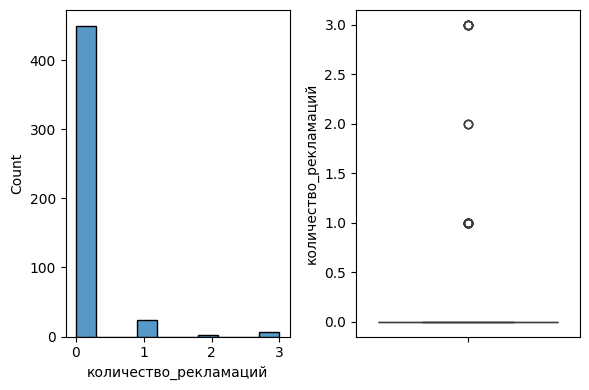

In [ ]:
describe_numeric_column(df[numeric_columns[-1]])

In [ ]:
def describe_nom_col(col):
    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(5, 4))
    test_col = df[col].fillna("Nan")
    axs[0].pie(test_col.value_counts(), labels=list(test_col.unique()))
    axs[1].hist(test_col)
    plt.tight_layout()

In [ ]:
def describe_nominal_cols(cols):
    plt.clf()
    global df
    fig, axs = plt.subplots(len(cols), 2, figsize=(16, 5 * len(cols)))
    row_index = 0
    for col in cols:
        test_col = df[col].fillna("Nan")
        test_col = test_col.astype(str)
        axs[row_index, 0].pie(test_col.value_counts(), labels=list(test_col.unique()))
        test_col = test_col.apply(lambda x: f"{x[:15]}")
        axs[row_index, 1].hist(test_col, orientation="vertical")
        row_index += 1
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

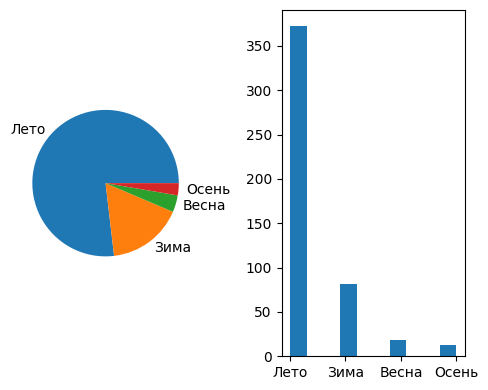

In [ ]:
describe_nom_col(nominal_columns[0])
# plt.pie(df["время_года"].value_counts(), labels=list(df["время_года"].unique()))

<Figure size 640x480 with 0 Axes>

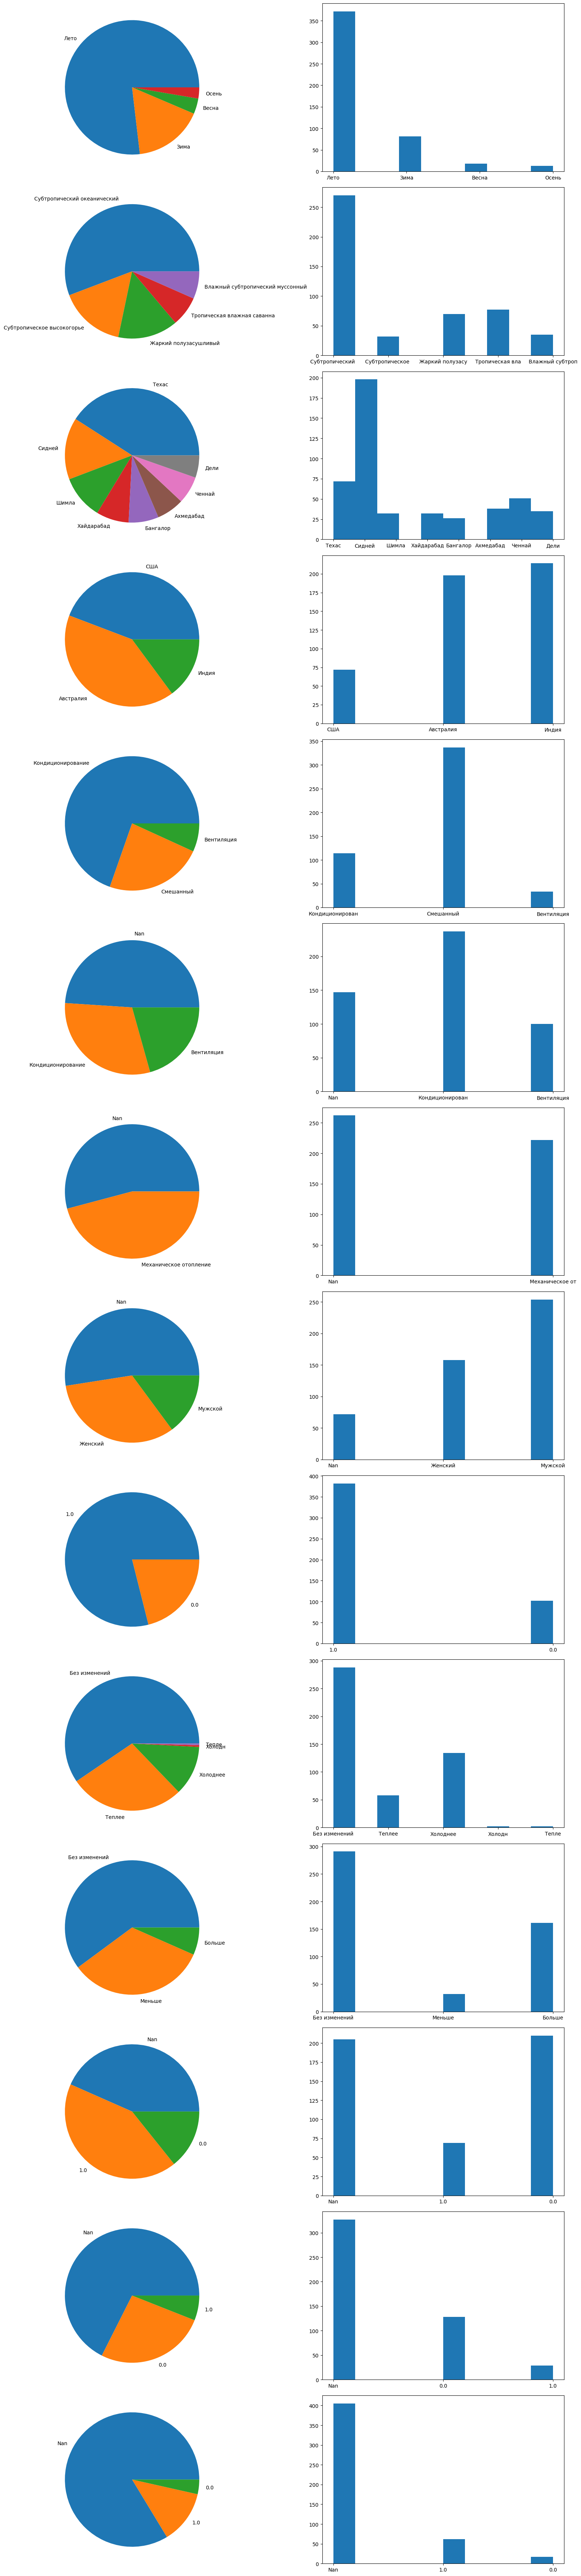

In [ ]:
describe_nominal_cols(nominal_columns)